# Machine learning on Tiatnic dataset.

## 1.Importing libraries

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
data = pd.read_csv('Titanic.csv',index_col='PassengerId')

In [114]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Identifying dependent and independent variable

<AxesSubplot:>

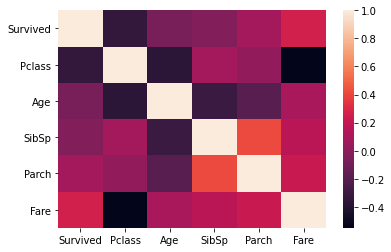

In [4]:
sns.heatmap(data.corr())

In [115]:
#Dropping unwanted columns
data.drop(['Name','Cabin','Ticket'],axis =1,inplace =True)

In [116]:
X = data.iloc[:,1:]
Y = data.loc[:,['Survived']]

## 3.Understanding data

<AxesSubplot:xlabel='Sex', ylabel='count'>

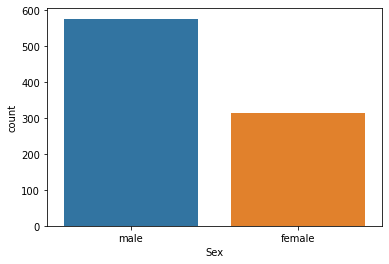

In [7]:
sns.countplot(x='Sex',data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

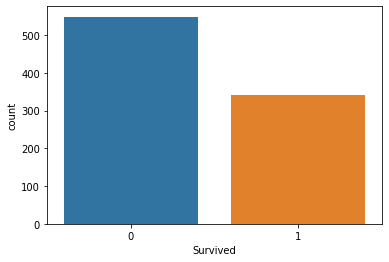

In [8]:
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

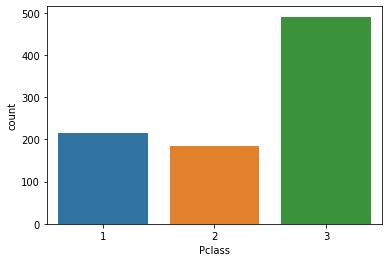

In [9]:
sns.countplot(x= 'Pclass',data = data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

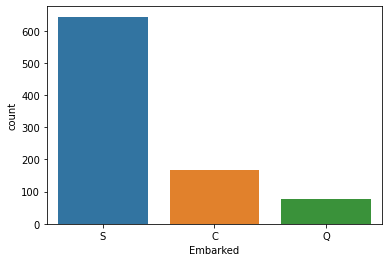

In [10]:
sns.countplot(x= 'Embarked',data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

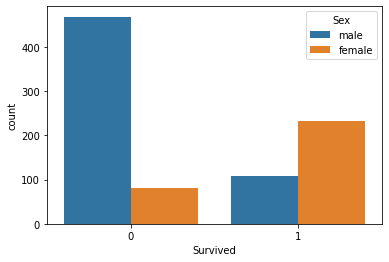

In [11]:
sns.countplot(x='Survived',hue='Sex',data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

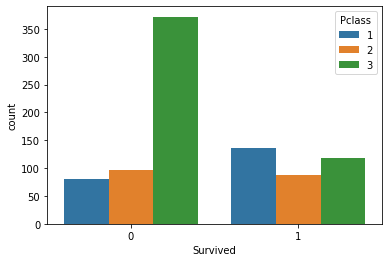

In [12]:
sns.countplot(x="Survived",hue="Pclass",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

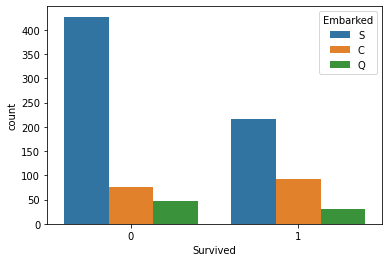

In [13]:
sns.countplot(x='Survived',hue='Embarked',data=data)

## 4.Data preprocessing

### Creating dummy variables

In [117]:
X['Sex_male'] = X.loc[:,'Sex'].map({'male' : 1,'female':0})
X['Embarked'] = X.loc[:,'Embarked'].map({'S' : int(0),'C':int(1),'Q':int(2)})
X.drop(['Sex'],axis=1,inplace = True)

### Treating missing values

In [118]:
X.isnull().sum()

Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Sex_male      0
dtype: int64

In [119]:
X['Embarked'] = X['Embarked'].fillna(value =0)

In [120]:
df = X[X['Pclass'] == 1]
df.loc[:,['Age']] = df.loc[:,['Age']].fillna(value = df.loc[:,['Age']].mean())
X[X['Pclass'] == 1] = df

C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [121]:
df = X[X['Pclass'] == 2]
df.loc[:,['Age']] = df.loc[:,['Age']].fillna(value = df.loc[:,['Age']].mean())
X[X['Pclass'] == 2] = df

C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [122]:
df = X[X['Pclass'] == 3]
df.loc[:,['Age']] = df.loc[:,['Age']].fillna(value = df.loc[:,['Age']].mean())
X[X['Pclass'] == 3] = df

C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [123]:
X.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Sex_male    0
dtype: int64

### Removing Outliers

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

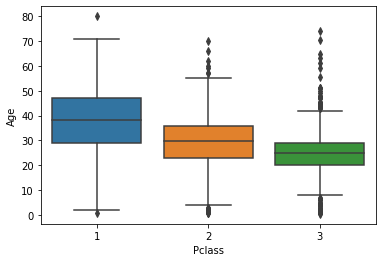

In [124]:
sns.boxplot(x=X['Pclass'],y=X['Age'])

In [125]:
df = X[X['Pclass'] == 1]
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper = df['Age'].quantile(0.75) + 1.5*IQR
lower = df['Age'].quantile(0.25) - 1.5*IQR
print(upper,lower)
print(df['Age'].quantile(np.arange(0,1,0.01)))

74.625 1.625
0.00     0.92
0.01     5.05
0.02    14.30
0.03    16.00
0.04    16.60
        ...  
0.95    62.00
0.96    62.40
0.97    64.00
0.98    65.00
0.99    70.85
Name: Age, Length: 100, dtype: float64


C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

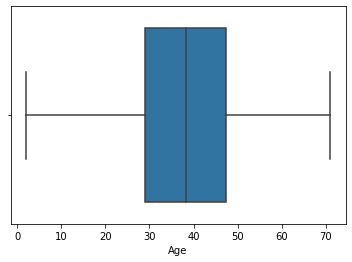

In [126]:
filt1 = df['Age'] <= lower
filt2 = df['Age'] >= upper

df.loc[filt1,['Age']] = df['Age'].quantile(0.01)
df.loc[filt2,['Age']] = df['Age'].quantile(0.99)

sns.boxplot(df.Age)

In [127]:
X[X['Pclass'] == 1] = df

In [128]:
df = X[X['Pclass'] == 2]
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper = df['Age'].quantile(0.75) + 1.5*IQR
lower = df['Age'].quantile(0.25) - 1.5*IQR
print(upper,lower)
print(df['Age'].quantile(np.arange(0,1,0.02)))

55.5 3.5
0.00     0.670000
0.02     1.000000
0.04     3.000000
0.06     4.000000
0.08     7.640000
0.10    14.600000
0.12    17.000000
0.14    18.000000
0.16    19.000000
0.18    19.000000
0.20    21.000000
0.22    22.260000
0.24    23.000000
0.26    23.580000
0.28    24.000000
0.30    24.000000
0.32    25.000000
0.34    25.000000
0.36    26.000000
0.38    27.000000
0.40    28.000000
0.42    28.000000
0.44    28.000000
0.46    29.000000
0.48    29.737209
0.50    29.877630
0.52    29.877630
0.54    29.977973
0.56    30.000000
0.58    30.140000
0.60    31.000000
0.62    32.000000
0.64    32.560000
0.66    33.780000
0.68    34.000000
0.70    34.000000
0.72    35.000000
0.74    36.000000
0.76    36.000000
0.78    37.740000
0.80    39.400000
0.82    41.060000
0.84    42.000000
0.86    44.000000
0.88    46.040000
0.90    49.400000
0.92    50.360000
0.94    54.000000
0.96    54.680000
0.98    59.340000
Name: Age, dtype: float64


C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

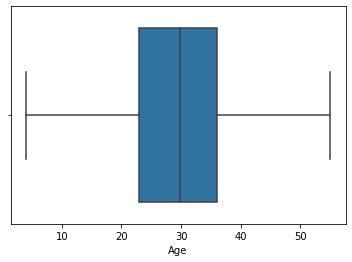

In [129]:
filt1 = df['Age'] <= lower
filt2 = df['Age'] >= upper

df.loc[filt1,['Age']] = df['Age'].quantile(0.06)
df.loc[filt2,['Age']] = df['Age'].quantile(0.96)

sns.boxplot(df.Age)

In [130]:
X[X['Pclass'] == 2] = df

In [131]:
df = X[X['Pclass'] == 3]
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper = df['Age'].quantile(0.75) + 1.5*IQR
lower = df['Age'].quantile(0.25) - 1.5*IQR
print(upper,lower)
print(df['Age'].quantile(np.arange(0,1,0.02)))

42.125 7.125
0.00     0.42000
0.02     2.00000
0.04     4.00000
0.06     6.40000
0.08     9.00000
0.10    14.00000
0.12    16.00000
0.14    16.00000
0.16    18.00000
0.18    18.00000
0.20    19.00000
0.22    19.80000
0.24    20.00000
0.26    21.00000
0.28    21.00000
0.30    22.00000
0.32    22.00000
0.34    23.80000
0.36    24.00000
0.38    25.00000
0.40    25.14062
0.42    25.14062
0.44    25.14062
0.46    25.14062
0.48    25.14062
0.50    25.14062
0.52    25.14062
0.54    25.14062
0.56    25.14062
0.58    25.14062
0.60    25.14062
0.62    25.14062
0.64    25.14062
0.66    25.14062
0.68    26.00000
0.70    26.00000
0.72    28.00000
0.74    28.00000
0.76    29.00000
0.78    30.00000
0.80    31.00000
0.82    32.00000
0.84    33.00000
0.86    34.70000
0.88    36.00000
0.90    39.00000
0.92    40.40000
0.94    42.60000
0.96    45.00000
0.98    50.20000
Name: Age, dtype: float64


C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

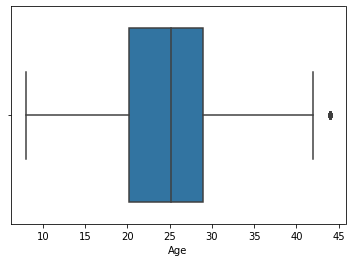

In [132]:
filt1 = df['Age'] <= lower
filt2 = df['Age'] >= upper

df.loc[filt1,['Age']] = df['Age'].quantile(0.08)
df.loc[filt2,['Age']] = df['Age'].quantile(0.95)

sns.boxplot(df.Age)

In [133]:
X[X['Pclass'] == 3] = df

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

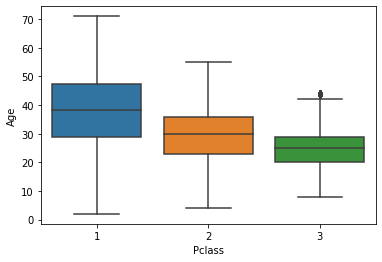

In [134]:
sns.boxplot(x=X['Pclass'],y=X['Age'])

In [135]:
data1 = X.copy()

### Scaling the data 

In [136]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### test-train-split 

In [137]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.02)

## 5.Building ML models. 

### Linear-regression model

In [138]:
model = LogisticRegression()
model.fit(x_train,y_train)
test_pred = model.predict(x_test)
regression_model = classification_report(y_test,test_pred)

C:\Users\ANIKET\anaconda3\envs\NeuralNet\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## DecisionTree model

In [139]:
#For Tree model droping the age and fare column
data1.drop(['Age','Fare'],axis = 1,inplace = True)

In [140]:
data1.head()

,Pclass,SibSp,Parch,Embarked,Sex_male
PassengerId,,,,,
1,3,1,0,0.0,1
2,1,1,0,1.0,0
3,3,0,0,0.0,0
4,1,1,0,0.0,0
5,3,0,0,0.0,1


In [141]:
Y = data1.iloc[:,0].values
X = data1.iloc[:,1:].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10)

In [142]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
Y_pred = tree.predict(X_test)
tree_model = classification_report(Y_test,Y_pred)

## RandomForest model

In [143]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)
random_forest_model = classification_report(y_test,y_pred)

<ipython-input-143-8093e0084328>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train)


## Artificial Neural Network

In [146]:
model = Sequential([
    Dense(16,input_shape=(7,), activation='relu'),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dense(7,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [147]:
rlp = ReduceLROnPlateau(monitor='loss',patience=5,factor=0.1)

In [150]:
model.compile(optimizer=Adam(0.001),loss = binary_crossentropy, metrics = ['accuracy'])
history = model.fit(x = x_train, y= y_train, epochs = 500,callbacks = rlp, verbose = 1)

Epoch 1/500
28/28 [==============================] - 1s 5ms/step - loss: 0.4195 - accuracy: 0.8304
Epoch 2/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3764 - accuracy: 0.8504
Epoch 3/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.8180
Epoch 4/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.8119
Epoch 5/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3973 - accuracy: 0.8334
Epoch 6/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.8284
Epoch 7/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3950 - accuracy: 0.8427
Epoch 8/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4169 - accuracy: 0.8225
Epoch 9/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.8387
Epoch 10/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.8398
Epoch 11/

28/28 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.8411
Epoch 83/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3885 - accuracy: 0.8389
Epoch 84/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3948 - accuracy: 0.8396
Epoch 85/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3719 - accuracy: 0.8535
Epoch 86/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4240 - accuracy: 0.8267
Epoch 87/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.8350
Epoch 88/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3841 - accuracy: 0.8501
Epoch 89/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3816 - accuracy: 0.8472
Epoch 90/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4142 - accuracy: 0.8307
Epoch 91/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3996 - accuracy: 0.8349
Epoch 92/500


28/28 [==============================] - 0s 5ms/step - loss: 0.3758 - accuracy: 0.8421
Epoch 164/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3965 - accuracy: 0.8442
Epoch 165/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3617 - accuracy: 0.8646
Epoch 166/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3828 - accuracy: 0.8520
Epoch 167/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3652 - accuracy: 0.8519
Epoch 168/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3556 - accuracy: 0.8605
Epoch 169/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3758 - accuracy: 0.8496
Epoch 170/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.8417
Epoch 171/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3876 - accuracy: 0.8424
Epoch 172/500
28/28 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8244: 0s 

28/28 [==============================] - 0s 6ms/step - loss: 0.3786 - accuracy: 0.8460
Epoch 244/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3802 - accuracy: 0.8333
Epoch 245/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3720 - accuracy: 0.8449
Epoch 246/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3922 - accuracy: 0.8435
Epoch 247/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.8649
Epoch 248/500
28/28 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.8338
Epoch 249/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3763 - accuracy: 0.8494
Epoch 250/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3784 - accuracy: 0.8486
Epoch 251/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3786 - accuracy: 0.8478
Epoch 252/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 0.8484
Epoc

28/28 [==============================] - 0s 6ms/step - loss: 0.3622 - accuracy: 0.8478
Epoch 325/500
28/28 [==============================] - 0s 6ms/step - loss: 0.4059 - accuracy: 0.8302
Epoch 326/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3533 - accuracy: 0.8516
Epoch 327/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.8514
Epoch 328/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3848 - accuracy: 0.8442
Epoch 329/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3859 - accuracy: 0.8414
Epoch 330/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3743 - accuracy: 0.8495
Epoch 331/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3718 - accuracy: 0.8577
Epoch 332/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.8546
Epoch 333/500
28/28 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy: 0.8238
Epoc

28/28 [==============================] - 0s 6ms/step - loss: 0.3864 - accuracy: 0.8361
Epoch 406/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3888 - accuracy: 0.8336
Epoch 407/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.8469
Epoch 408/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3563 - accuracy: 0.8655
Epoch 409/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3754 - accuracy: 0.8517
Epoch 410/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3492 - accuracy: 0.8625
Epoch 411/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8572
Epoch 412/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3622 - accuracy: 0.8471
Epoch 413/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3436 - accuracy: 0.8695
Epoch 414/500
28/28 [==============================] - 0s 6ms/step - loss: 0.3993 - accuracy: 0.8285
Epoc

28/28 [==============================] - 0s 5ms/step - loss: 0.3972 - accuracy: 0.8359
Epoch 486/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.8639
Epoch 487/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4011 - accuracy: 0.8295
Epoch 488/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3952 - accuracy: 0.8309
Epoch 489/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4101 - accuracy: 0.8264
Epoch 490/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3836 - accuracy: 0.8360
Epoch 491/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3996 - accuracy: 0.8348
Epoch 492/500
28/28 [==============================] - 0s 5ms/step - loss: 0.4071 - accuracy: 0.8364
Epoch 493/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3659 - accuracy: 0.8514
Epoch 494/500
28/28 [==============================] - 0s 5ms/step - loss: 0.3797 - accuracy: 0.8459
Epoc

In [151]:
y_pred = model.predict(x_test)
y_pred = y_pred.round()
ANN = classification_report(y_test,y_pred)
print(ANN)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.80      0.80      0.80        10

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18



## 6.Evaluating the models

In [152]:
print('Classification report for regression_model:-\n')
print(regression_model)
print('Classification report for tree_model:-\n')
print(tree_model)
print('Classification report for random_forest_model:-\n')
print(random_forest_model)
print('Classification report for Artificial Neural Network:-\n')
print(ANN)

Classification report for regression_model:-

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.73      0.80      0.76        10

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

Classification report for tree_model:-

              precision    recall  f1-score   support

           1       0.43      0.23      0.30        26
           2       0.50      0.10      0.17        20
           3       0.56      0.91      0.69        44

    accuracy                           0.53        90
   macro avg       0.49      0.41      0.39        90
weighted avg       0.51      0.53      0.46        90

Classification report for random_forest_model:-

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.75      0.90      0.82     